In [6]:
import logging
import pandas as pd
import torch
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import model
import anomaly_detection
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

In [13]:
def convert_date(timelist):
    converted = list()
    for x in timelist:
        converted.append(datetime.fromtimestamp(x))
    return converted

In [14]:
def known_anomalies(anomalies_list):
    found = list()
    for i in range(len(anomalies_list)):
        if anomalies_list[i] == 1:
            found.append(i)
    return found
        

In [15]:
def plot(dfs, anomalies=[]):   
    if isinstance(dfs, pd.DataFrame):
        dfs = [dfs]
        
    df = dfs[0]
    time = convert_date(df['timestamp'])
    if 'anomaly' in df.columns:
        anomalies_data = known_anomalies(df['anomaly'])

    fig = plt.figure(figsize=(30, 6))
    ax = fig.add_subplot(111)

    for df in dfs:
        plt.plot(time, df['signal'])
    
    for a_f in anomalies_data:
        plt.axvline(time[a_f], color='r', alpha=0.02)

    plt.title('Dataset', size=34)
    plt.ylabel('value', size=30)
    plt.xlabel('Time', size=30)
    plt.xticks(size=26)
    plt.yticks(size=26)
    plt.xlim([time[0], time[-1]])
    
    plt.show()

In [16]:
#plot signal shape
train_pd = pd.read_csv('../prepared_data/A-3-train.csv', index_col=0)
test_pd = pd.read_csv('../prepared_data/A-3-test.csv', index_col=0)
print(train_pd.head())
print("")
print(test_pd.head())

timestamp    signal  anomaly
0  1222819200  0.113081        0
1  1222840800  0.113081        0
2  1222862400  0.333660        0
3  1222884000  0.333660        0
4  1222905600  0.559161        0

    timestamp    signal  anomaly
0  1281916800  0.402416        0
1  1281938400  0.204666        0
2  1281960000  0.402416        0
3  1281981600  0.204666        0
4  1282003200  0.204666        0


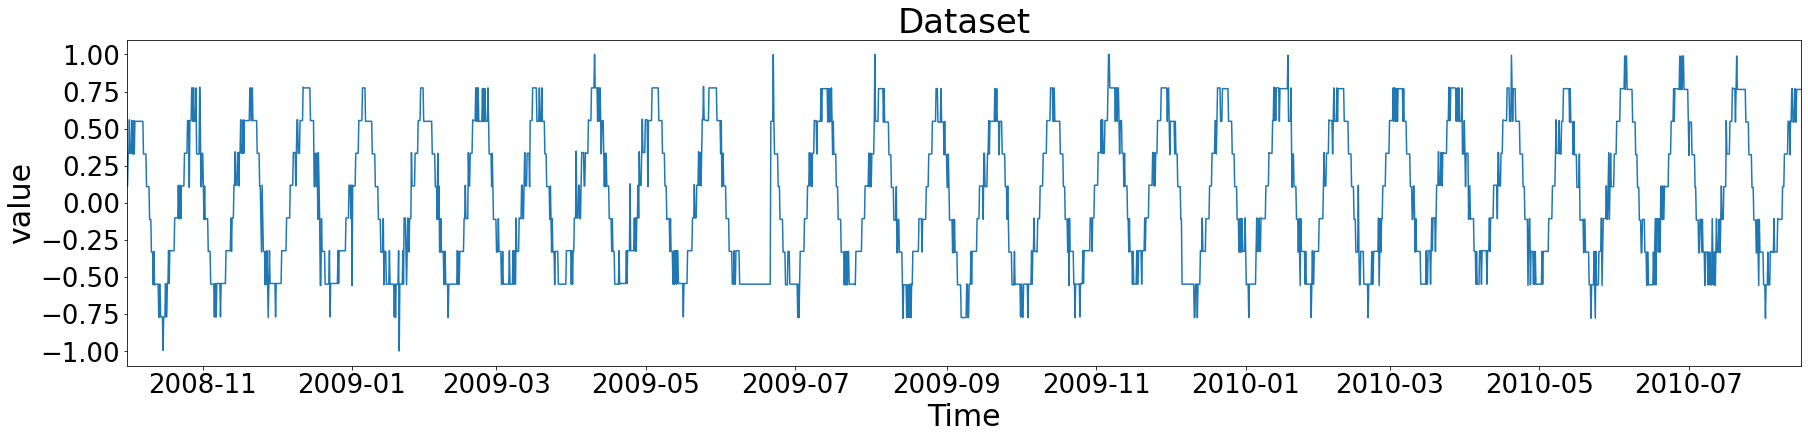

In [17]:
plot(train_pd)

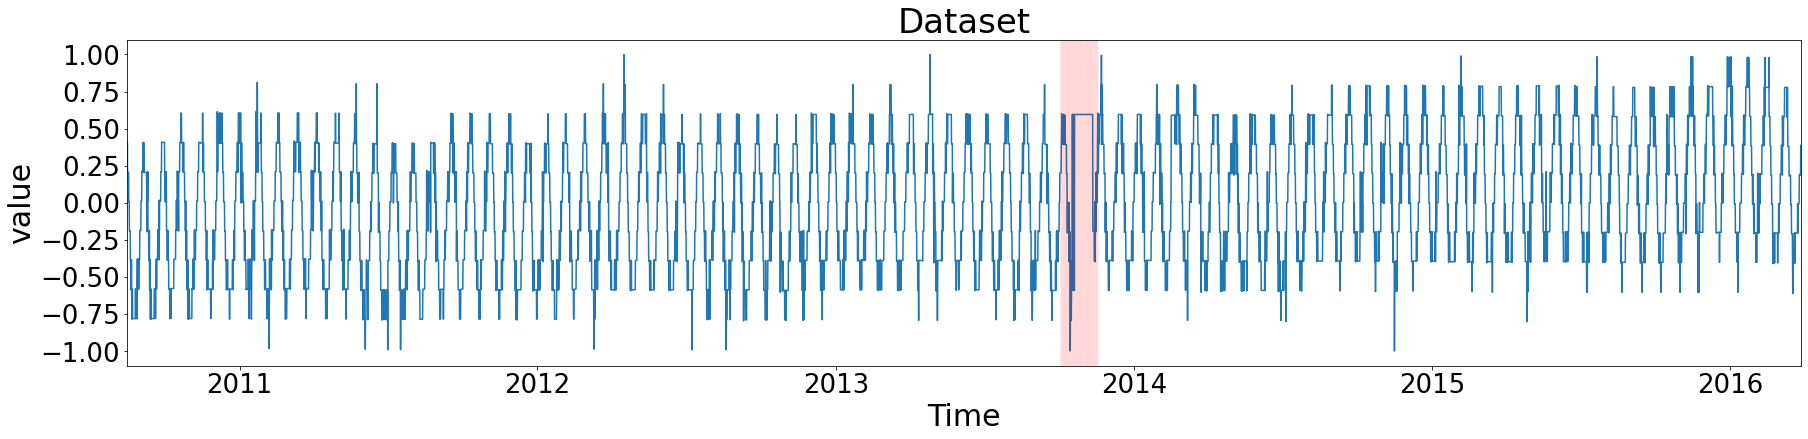

In [18]:
plot(test_pd)

In [19]:
train_dataset = SignalDataset(path=f'../prepared_data/A-3-train.csv')
test_dataset = SignalDataset(path=f'../prepared_data/A-3-test.csv')

In [16]:
y_true, y_pred = anomaly_detection.test(test_loader, encoder, decoder, critic_x, dataset_idx=3)

126it [12:53,  6.14s/it]Accuracy 0.97
Precision 0.00
Recall 0.00
F1 Score 0.00



In [18]:
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]
